# 차원 축소

- 과일 사진의 경우는 10000개의 픽셀이 있기 때문에 10000개의 특성이 있음
- 차원의 저주
    - 일반적인 머신러닝 문제는 수천~수백만 개의 특성을 가지는 경우도 있음
    - 특성이 너무 많으면 훈련이 느리게 될 뿐 아니라 좋은 솔루션을 찾기 어렵게 됨
    - 이러한 문제를 차원의 저주(curse of dimensionality)라고 함
- 차원 축소(dimensionality reduction)
    - 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 모델의 성능을 향상시키는 방법
        - 예) 이미지 경계면의 배경 부분 제거, 서로 인접한 픽셀들을 결합 등

## 주성분 분석(principal component analysis)

- 데이터에 있는 분산이 큰 방향을 찾는 것
    - 분산 : 데이터가 퍼져있는 정도
 
<img src="./image/pca1.gif" />

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [2]:
fruits = np.load("./data/fruits_300.npy")
fruits_2d = fruits.reshape(-1, 100 * 100)

In [3]:
fruits_2d.shape

(300, 10000)

In [7]:
# n_components : 주성분의 개수
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [9]:
# pca가 찾은 주성분 확인
print(pca.components_.shape)

(50, 10000)


In [11]:
def draw_fruits(arr):
    n = len(arr)    # 샘플 수

    # 한 줄에 10개씩 이미지를 그릴 때, 몇 개 행이 필요할 지 행 개수 계산
    rows = int(np.ceil(n / 10))
    cols = 10

    fig, axs = plt.subplots(rows, cols, figsize = (cols, rows), squeeze = False)

    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:    # n개 까지만 시각화
                axs[i, j].imshow(arr[i * 10 + j], cmap = "gray_r")
            axs[i, j].axis("off")
    plt.show()

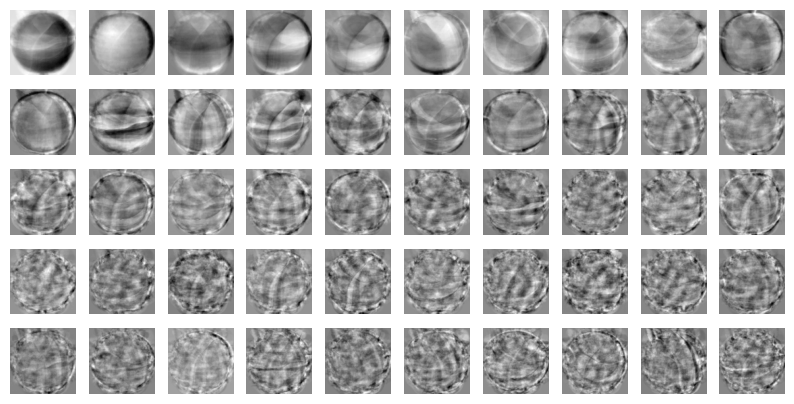

In [13]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

- 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타냄
    - 데이터셋에 있는 특징을 찾아낸 것

In [16]:
print(fruits_2d.shape)

(300, 10000)


In [18]:
# 원본 데이터의 차원을 50차원으로 축소
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

- 10000개의 특성을 50개로 줄이면 정보 손실이 없을 수 없지만, 정보 손실을 최소한으로 했기 때문에 축소된 데이터에서 원본 데이터에 가깝게 복구할 수 있음

In [21]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


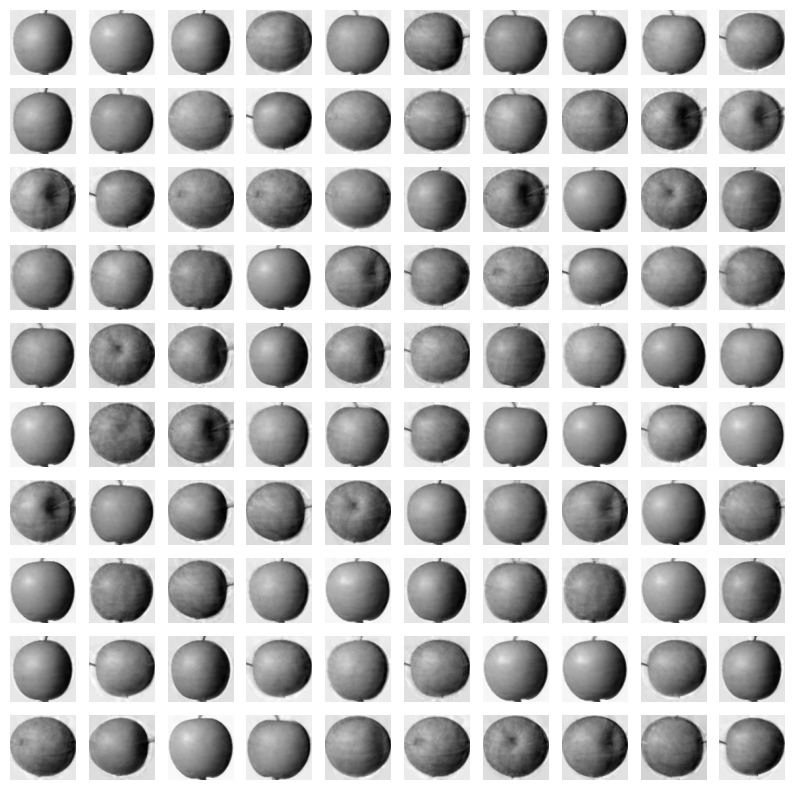

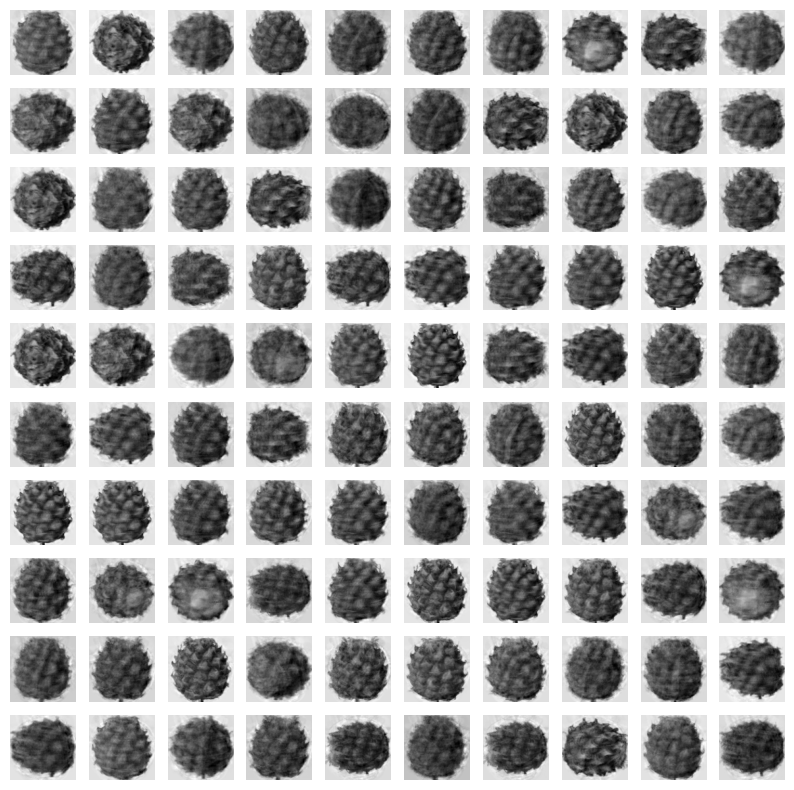

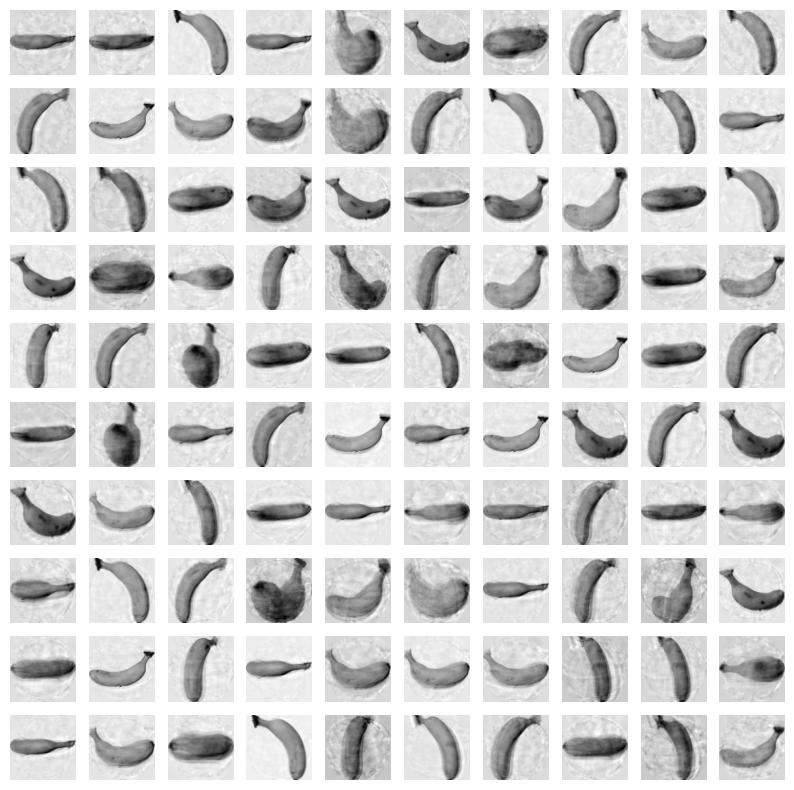

In [23]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start : start + 100])
    print()

## 설명된 분산(explained variance)

- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
- pca 클래스의 explained_variance_ratio_ 에 설명된 분산 비율이 기록되어 있음

In [25]:
# 50개의 주성분으로 표현하고 있는 총 분산 비율
print(np.sum(pca.explained_variance_ratio_))

0.9215000958017665


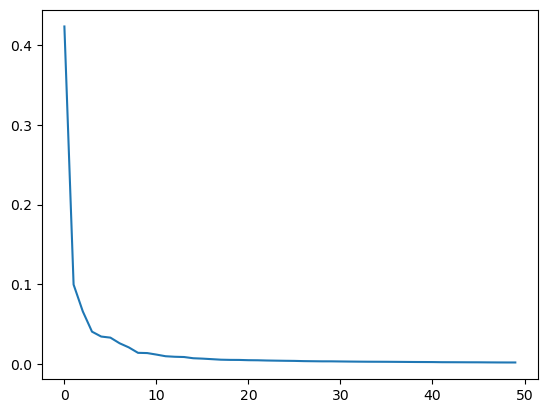

In [26]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

## 다른 알고리즘과 함께 사용하기

In [31]:
# 레이블 생성
# 사과 = 0, 파인애플 = 1, 바나나 = 2
y = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [33]:
# 로지스틱 회귀 모델 객체 생성
lr = LogisticRegression()

In [35]:
# 원본 데이터로 성능 테스트
scores = cross_validate(lr, fruits_2d, y)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9966666666666667
0.12170619964599609


In [37]:
# pca로 축소한 데이터로 성능 테스트
scores = cross_validate(lr, fruits_pca, y)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9966666666666667
0.00805506706237793
